<a href="https://colab.research.google.com/github/ANNEPYTHON/PONT2ANNE/blob/main/lectures/hands-on/L07%2608%20-%20FG_ANN-basic/ALERT2023_handson_Ch7_8_Exo1-TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALERT 2023**

## **Artificial Neural Networks - Chapters 7 and 8**


Author: Filippo Gatti

### Disclaimer

This hands-on notebook is devoted to **artificial Neural Networks** ($\mathcal{NN}$) and it covers chapters 7 and 8.

In the following, the code cells introduced by a tag **[TODO]** are meant to be completed by you!

In [1]:
# basic packages
from IPython.display import Image
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.colors import ListedColormap

# This is required only for notebooks
%matplotlib inline

-----

## **Preliminaries**: practicing with `python3`

Before getting started, a few general hints:

1. `lambda` constructors: they are used in `python` to define anonymous functions ([see this link](https://realpython.com/python-lambda/))




In [ ]:
import numpy as np

arr = np.array([1.5, 2.8, 3.1])
scale = lambda x: x * 3
scale(arr)

2. Handle `pandas` dataframe

In [ ]:

Image(url="https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg",width=500)

In [ ]:
# Empty dataframe
df = pd.DataFrame()
print(df)

In [ ]:
# Basic database
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df.describe())

In [ ]:
# Database with column labels
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

In [ ]:
# Repartitioning data into dataframe
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print(df)

In [ ]:
# Deal with indices
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

3. plot data: ([see this link](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))



In [ ]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

# **Exercise 1** Non-linear regressions of real functions with $\mathcal{MLP}$

The aim of this task is to get acquainted with non-linear polynomial regressions. In this task, the following *kindergarten* equation is considered:

$$f(x) = \sin(30 \cdot (x-0.9)^4)\cos(2 \cdot (x-0.9))+\frac{x-0.9}{2}$$

Given the equation above, solve the following issues:

## - Step 1 **[TODO]**: Plot $f(x)$ and evaluate it at $N$=100 random points $x_i\sim\mathcal{U}\left[0,1\right]$

ValueError: x, y, and format string must not be None

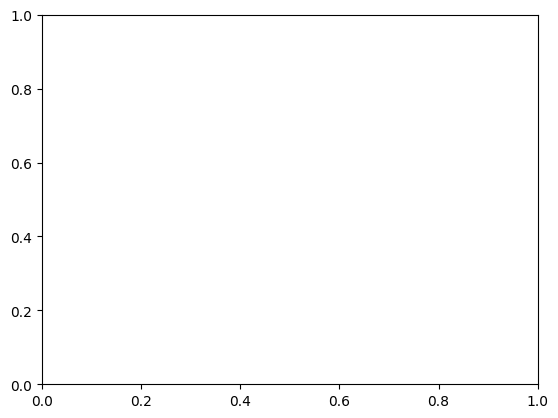

In [2]:
import numpy
# Grant reproductibility
np.random.seed(0)
N = 10
x_plot = np.linspace(0, 1, N*100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_plot,
                             size=N,
                             replace=False))
def f(x):
    return # [TODO]
y_train = f(x_train)

# create 2D-array versions of these arrays to feed to transformers
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()



## - Step 2 **[TODO]**: Fit the selected points for different polynomial orders (hint: 3,4,5,... or piece-wise polynomials). Show the fitting improvements obtained when changing the polynomial order.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen",
           "gold", "darkorange", "tomato",
           "skyblue"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
alpha = 1e-10# penalty coefficient
for degree in [3, 4, 5, 9, N]:
    model = make_pipeline(PolynomialFeatures(degree),
                          Ridge(alpha=alpha))
    # [TODO]
    # Hint: use the sklearn function `fit` and `predict`
    ax.plot(x_plot, y_plot, label=f"degree {degree}")


ax.legend()
ax.set_xlim(0, 1)
plt.show()


## - Step 3 **[TODO]**: How the fit improves when considering 100, 1000 random points?

In [ ]:
N = 1000
x_train = np.sort(rng.choice(x_plot,
                             size=N,
                             replace=False))
y_train = f(x_train)
X_train = x_train[:, np.newaxis]

lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen",
           "gold", "darkorange", "tomato",
           "skyblue"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")
# polynomial features
alpha =0 # penalty coefficient
for degree in [3, 4, 5, 9, N//2, N-1]:
    model = make_pipeline(PolynomialFeatures(degree),
                          Ridge(alpha=alpha))
    # [TODO]
    # Hint: use the sklearn function `fit` and `predict`
    ax.plot(x_plot, y_plot, label=f"degree {degree}")


ax.legend()
ax.set_xlim(0, 1)

## - Step 4 **[TODO]**:  Design a $\mathcal{MLP}$ to fit the curve sampled with 10, 100, 1000 points respectively. Use the least number of layers and neurons possible.

## - Step 4.1 **[TODO]**:  create and split dataset



In [ ]:
import torch
torch.manual_seed(0)

In [ ]:
'''[TODO] Create dataset'''
from sklearn.model_selection import train_test_split

m = torch.distributions.Uniform(torch.zeros(1),
                                torch.ones(1))

N = 1000
X = m.sample((N,)).to(torch.float32)

# split into train and test sets
# Hint: use the sklearn function `train_test_split`
# [TODO]

## - Step 4.2 **[TODO]**:  design the $\mathcal{MLP}$

In [ ]:
from torch import nn
'''[TODO] Design MLP'''

fan_in = 4
h_theta = nn.Sequential(
    # [TODO]
)

## - Step 4.3 **[TODO]**:  choose the optimizer

In [ ]:
'''[TODO] Optimization setup'''
# Define the loss function
loss_fn = # [TODO]

# number of epochs
n_e = 800

# batch size and batch per epochs
batch_size = 200
batches_per_epoch = len(X_train) // batch_size

# Optimizer
learning_rate = 0.0001
beta1 = 0.9 # Adam coefficients
beta2 = 0.999 # Adam coefficients
epsilon = 1e-8 # tolerance
optimizer = # [TODO]

## - Step 4.4 **[TODO]**:  train the $\mathcal{MLP}$

In [ ]:
'''[TODO] Train the hidden-layer MLP'''
import tqdm
train_loss_hist = []
test_loss_hist = []
for epoch in range(n_e):
    epoch_loss = []
    # set model in training mode
    h_theta.train()

    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred = h_theta(X_batch).squeeze()
            # compute the loss
            loss = # [TODO]
            # reset previously saved gradients and empty the optimizer memory
            optimizer.zero_grad()
            # run backward propagation
            # [TODO]
            # update weights
            # [TODO]
            # compute and store metrics
            epoch_loss.append(float(loss))

    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta.eval()
    # infer the class over the test set
    y_pred = h_theta(X_test).squeeze()
    acc = float(loss_fn(y_pred, y_test))
    train_loss_hist.append(np.mean(epoch_loss))
    test_loss_hist.append(acc)
    # print(f"Epoch {epoch} validation: MSE={acc:.1f}")

## - Step 4.5 **[TODO]**:  plot the learning curves and the comparison between test data and prediction from trained $\mathcal{MLP}$

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.semilogy(train_loss_hist,
            color='b',
            linewidth=1,
            label=r"train $h_{\mathbf{\theta}}(\mathbf{x})$")
# [TODO] Plot test curve (use label=r"test $h_{\mathbf{\theta}}(\mathbf{x})$"))
ax.set_xlabel("epoch")
ax.set_ylabel(r"$\Vert f(x)-h_\theta(x) \Vert^2$")
ax.set_xlim(0,n_e)
ax.set_ylim(1e-6,1e0)
ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.0),ncol=2,)
fig.savefig("mse_fx_compare.png", dpi=300, bbox_inches="tight")

In [ ]:
h_theta.eval()

lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen",
           "gold", "darkorange", "tomato",
           "skyblue"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

ax.scatter(X_test.cpu().numpy(),h_theta(X_test).detach().cpu().numpy())

# **Exercise 2**: Approximate an approximately-radial function with $\mathcal{MLP}$ (see Section 2.4, Chapter 7)

## **Quick facts**


- Despite the fact that Universal approximation theorem for a 1-hidden-layered perceptron (see Theorem 24, Chapter 8) proves the universal approximation capability of a 1-hidden-layer $\mathcal{MLP}$, provided that enough neurons are considered, this result is quite hard to exploit in real applications, since the number of neurons can easily become too large to handle from a computational standpoint.

- Eldan and Shamir [1] showed that it exists an approximately radial function $\varphi(\mathbf{x}):\mathbb{R}^{d_X}\to\mathbb{R}$, $\varphi: \mathbf{x}\mapsto\varphi(\Vert\mathbf{x}\Vert)$ that can be approximated by a ``small`` (bounded number of neurons) 2-hidden-layers $\mathcal{MLP}$ with arbitrary accuracy, but that cannot be approximated by a 1-hidden-layer $\mathcal{MLP}$ below a certain accuracy, unless the number of neurons $N_K$ grows exponentially with $d_X$.

- In particular, this results is valid for any activation function $g$ and with no further constraint on the weights and biases adopted in the $\mathcal{MLP}$ (on the contrary, the Universal Approximation Theorem requires that the high-frequency components $\Vert \mathbf{w}_n\Vert$ are smaller than a constant).




### *Bibliography*:

[1] Eldan, R.; Shamir, O. The Power of Depth for Feedforward Neural Networks. In Workshop and Conference Proceedings; PMLR, 2016; Vol. 49, pp 1--34. url: https://proceedings.mlr.press/v49/eldan16

## **Questions**

- What kind of functions cannot be approximated with a *reasonable* accuracy by a $\mathcal{MLP}$ of $N_\ell$ layers?

- How many neurons should be considered for each layer?

- What is the effect of having a number of layers that is higher than the number of neurons per layer?

## **Learning Outcomes**

- This results proves that increasing the depth of the $\mathcal{MLP}$ widens the approximation capability of the $\mathcal{MLP}$ and that the depth of the $\mathcal{MLP}$ should be privileged with the respect to its layer dimension (but being careful to avoid vanishing
gradient problems).

## **Objective**

In the following, you are asked to conceive a multi-layer feed-forward $\mathcal{MLP}$ to approximate the following approximately-radial function and compare the accuracy obtained with 1-hidden layer and with 2-hidden layers. The approximately-radial function is defined as:

$$\varphi(\mathbf{x}) = \left(\frac{R_{d_X}}{\Vert\mathbf{x}\Vert}\right)^{\frac{d_X}{2}}J_{\frac{d_X}{2}}(2\pi R_{d_X}\Vert\mathbf{x}\Vert)  =\int_{\mathbf{w}:\Vert\mathbf{w}\Vert\le R_d} e^{-2\pi i \langle \mathbf{x}, \mathbf{w}\rangle} d\mathbf{w}\phantom{}^{(1)}
$$

with $J_{\frac{d_X}{2}}(2\pi R_{d_X}\Vert\mathbf{x}\Vert)$ the Bessel function of first kind of order $\frac{d_X}{2}$. In the following, consider $d_X=2$.

**$\phantom{}^{(1)}$Note**: The approximately radial function is the inverse Fourier transform of the indicator function on a unit volume euclidean ball $B_{R_{d_X}}(0)$, of radius $R_{d_X}$ such that its volume $V_{d_X}(R_{d_X}) = 1$.

## - Step 1: compute and plot the approximately-radial function $\varphi$ on, restricted to a compact set $\mathcal{X}_{\square}=\left[-l_x,l_x\right]\times\left[-l_y,l_y\right]\subset\mathbb{R}^2$ over a discrete regular grid of $n_x\times n_y$ points.

In [ ]:
'''Define grid in R2'''
lx = 10.0
ly = 10.0
x_lim = np.array([-lx,lx], dtype=np.float64) # x-bounds
y_lim = np.array([-ly,ly], dtype=np.float64) # y-bounds

nx = 1001 # number of grid points along x
ny = 1001 # number of grid points along y
# vector of coordinates along x
xv = np.linspace(x_lim[0], x_lim[1], nx, endpoint=True)
# vector of coordinates along y
yv = np.linspace(y_lim[0], y_lim[1], ny, endpoint=True)
# define mesh grid
yg, xg = np.meshgrid(yv,xv)

## - Step 2: evaluate $\varphi$ over the grid and plot it

In [ ]:
'''Define varphi(x,y) over the grid'''
from scipy.special import jv # Bessel function
d_X = 2 # dimension of the problem
R_d = 0.2 # radius
phi = (R_d/(np.sqrt(xg**2+yg**2)))**(int(d_X//2))*jv(int(d_X//2),
                                                     2.0*np.pi*R_d*np.sqrt(xg**2+
                                                                           yg**2))
fig = plt.figure(figsize=(4,4),)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xg, yg, phi, cmap=cm.jet)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$\varphi(x,y)$")
fig.savefig("radial_function.png", dpi=300, bbox_inches="tight")

## - Step 3 **[TODO]**: create the training and test datasets by uniformly sampling the function $\varphi$ over $\mathcal{X}_\square$.

In [ ]:
''' [TODO] Create uniformly random grid of points for training'''
import torch
from sklearn.model_selection import train_test_split

# Grant reproductibility
torch.manual_seed(0)

# Hint: use the package torch.distributions
# https://pytorch.org/docs/stable/distributions.html
# for uniform distribution
m = torch.distributions # [TODO]
X = m.sample((4000,)).to(torch.float32)
y = (R_d/(np.sqrt(X[:,0]**2+X[:,1]**2)))**(int(d_X//2))*jv(int(d_X//2),
                                                           2.0*np.pi*R_d*np.sqrt(
                                                              X[:,0]**2+
                                                              X[:,1]**2))

# split into train and test sets
# Hint: use the sklearn function `train_test_split`
 # [TODO]

In [ ]:
fig = plt.figure(figsize=(9,4),)
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xg, yg, phi, cmap=cm.jet, alpha=0.3)
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='k', s=5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$\varphi(x,y)$")
ax.set_title("Train dataset")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xg, yg, phi, cmap=cm.jet, alpha=0.3)
ax.scatter(X_test[:,0], X_test[:,1], y_test, color='k', s=5)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$\varphi(x,y)$")
ax.set_title("Test dataset")
fig.savefig("train_test_radial_function.png", dpi= 300, bbox_inches="tight")

## - Step 4 **[TODO]**: Define a 1-hidden layer $\mathcal{MLP}$ $h_\theta^{(1)}$ and a 2-hidden layers $\mathcal{MLP}$ $h_\theta^{(2)}$ for further comparisons, using the `torch.nn` package. Adopt an adequate number of of hidden neurons for both cases.

**Note**: use $ReLU$ activation functions and linear output layer.

In [ ]:
from torch import nn

In [ ]:
'''[TODO] Define 1-hidden-layer MLP selecting an adequate fan_in'''
fan_in = 10000
h_theta1 = nn.Sequential(
 # [TODO]
)

In [ ]:
'''[TODO] Define 2-hidden-layer MLP'''
fan_in = 100
h_theta2 = nn.Sequential(
 # [TODO]
)

## - Step 5 **[TODO]**: Define the best optimizer for both $h_\theta^{(1)}$ and $h_\theta^{(2)}$. Choose the learning rate accordingly.

In [ ]:
''' [TODO] Define the optimizer for 1-hidden-layer MLP'''
learning_rate1 = 0.0001
optimizer1 =  # [TODO]

In [ ]:
''' [TODO] Define the optimizer for 2-hidden-layers MLP'''
learning_rate2 = 0.0001
optimizer2 =  # [TODO]

## - Step 6 **[TODO]**: setup the gradient descent strategy and the loss function. Optional: initialize the weights according to the best strategy.

In [ ]:
''' [TODO] Gradient descent set up and loss function'''
# Define the loss function
loss_fn =  # [TODO]

# number of epochs
n_e = 1000

# batch size and batch per epochs
batch_size = 200
batches_per_epoch = len(X_train) // batch_size

## - Step 7 **[TODO]**: Train $h_\theta^{(1)}$ and $h_\theta^{(2)}$ and track the approximation error for training and testing sets.

In [ ]:
''' [TODO] Train 1-hidden-layer MLP'''
import tqdm
train_loss_hist1 = []
test_loss_hist1 = []
for epoch in range(n_e):
    epoch_loss = []
    # set model in training mode
    h_theta1.train()

    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred =  # [TODO]
            # compute the loss
            loss =  # [TODO]
            # reset previously saved gradients and empty the optimizer memory
            optimizer1.zero_grad()
            # run backward propagation
            loss.backward()
            # update weights
            optimizer1.step()
            # compute and store metrics
            epoch_loss.append(float(loss))

    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta1.eval()
    # infer the class over the test set
    y_pred = h_theta1(X_test).squeeze()
    acc = float(loss_fn(y_pred, y_test))
    train_loss_hist1.append(np.mean(epoch_loss))
    test_loss_hist1.append(acc)
    print(f"Epoch {epoch} validation: MSE={acc:.1f}")

In [ ]:
'''[TODO] Train 2-hidden-layer MLP'''
import tqdm
train_loss_hist2 = []
test_loss_hist2 = []
for epoch in range(n_e):
    epoch_loss = []
    # set model in training mode
    h_theta2.train()

    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred = h_theta2(X_batch).squeeze()
            # compute the loss
            loss = loss_fn(y_pred, y_batch)
            # reset previously saved gradients and empty the optimizer memory
            # [TODO]
            # run backward propagation
            # [TODO]
            # update weights
            optimizer2.step()
            # compute and store metrics
            epoch_loss.append(float(loss))

    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta2.eval()
    # infer the class over the test set
    y_pred = h_theta2(X_test).squeeze()
    acc = float(loss_fn(y_pred, y_test))
    train_loss_hist2.append(np.mean(epoch_loss))
    test_loss_hist2.append(acc)
    # print(f"Epoch {epoch} validation: Accuracy={acc:.1f}")

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.semilogy(train_loss_hist1,
            color='b',
            linewidth=1,
            label=r"train $h^{1}_{\mathbf{\theta}}(\mathbf{x})$")
ax.semilogy(test_loss_hist1,
            color='r',
            linewidth=1,
            label=r"test $h^{1}_{\mathbf{\theta}}(\mathbf{x})$")
ax.semilogy(train_loss_hist2,
            color='steelblue',
            linewidth=3,
            label=r"train $h^{2}_{\mathbf{\theta}}(\mathbf{x})$")
ax.semilogy(test_loss_hist2,
            color='orange',
            linewidth=3,
            label=r"test $h^{2}_{\mathbf{\theta}}(\mathbf{x})$")
ax.set_xlabel("epoch")
ax.set_ylabel(r"$\Vert \varphi(x,y)-h_{\mathbf{\theta}}(\mathbf{x}) \Vert^2$")
ax.set_xlim(0,n_e)
ax.set_ylim(1e-6,1e0)
ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.0),ncol=2,)
fig.savefig("mse_radial_compare.png", dpi=300, bbox_inches="tight")

In [ ]:
h_theta2.eval()
fig = plt.figure(figsize=(4,4),)
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(xg, yg, phi, cmap=cm.jet, alpha=0.3)
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='k', s=30)
ax.scatter(X_test[:,0], X_test[:,1], y_test, color='orange', s=30)
ax.scatter(X_train[:,0], X_train[:,1],
           h_theta2(X_train).detach().cpu().numpy(), color='k', s=30, marker="x")
ax.scatter(X_test[:,0], X_test[:,1],
           h_theta2(X_test).detach().cpu().numpy(), color='orange', s=30, marker="x")

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$\varphi(x,y)$")

## - Step 8 **[TODO]**: what is the best traded-off between total number of weights, training time, approximation error?

Try different solutions !